C:\Users\optst\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8159 - loss: 0.4425 - val_accuracy: 0.8561 - val_loss: 0.3496
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8633 - loss: 0.3359 - val_accuracy: 0.8734 - val_loss: 0.3130
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8762 - loss: 0.3053 - val_accuracy: 0.8760 - val_loss: 0.3097
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8880 - loss: 0.2784 - val_accuracy: 0.8882 - val_loss: 0.2859
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8992 - loss: 0.2527 - val_accuracy: 0.8883 - val_loss: 0.2802
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9064 - loss: 0.2337 - val_accuracy: 0.8920 - val_loss: 0.2751
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9145 - loss: 0.2132 - val_accuracy: 0.8924 - val_loss: 0.2882
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9244 - loss: 0.1919 -

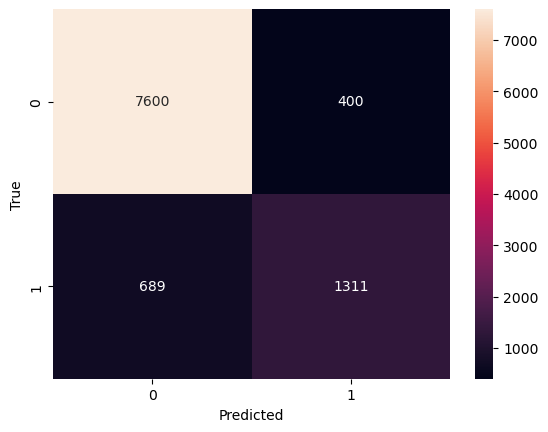

In [1]:
import numpy as np
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-10 dataset
def load_preprocess_data():
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
    train_labels = train_labels.flatten()
    test_labels = test_labels.flatten()

    # Define classes that can fly (1) and cannot fly (0)
    can_fly = [0, 2]  # airplane, bird
    cannot_fly = [1, 3, 4, 5, 6, 7, 8, 9]  # all other classes

    # Create binary labels for the new task
    train_labels = np.array([1 if label in can_fly else 0 for label in train_labels])
    test_labels = np.array([1 if label in can_fly else 0 for label in test_labels])

    # Normalize pixel values to be between 0 and 1
    train_images, test_images = train_images / 255.0, test_images / 255.0
    
    return train_images, train_labels, test_images, test_labels

# Build the CNN model
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Compile and train the model
def compile_and_train_model(model, train_images, train_labels, test_images, test_labels):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_images, train_labels, epochs=10, 
                        validation_data=(test_images, test_labels))
    return history

# Evaluate the model
def evaluate_model(model, test_images, test_labels):
    predictions = model.predict(test_images)
    predictions = (predictions > 0.5).astype(int)
    
    print("Classification Report:")
    print(classification_report(test_labels, predictions))
    
    print("Confusion Matrix:")
    cm = confusion_matrix(test_labels, predictions)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Main execution
if __name__ == "__main__":
    train_images, train_labels, test_images, test_labels = load_preprocess_data()
    model = build_model()
    compile_and_train_model(model, train_images, train_labels, test_images, test_labels)
    evaluate_model(model, test_images, test_labels)
